In [1]:
! cd ..
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [5]:
cd ..

/mnt/h/imc_projects/utag


/home/june/miniconda3/envs/utag-test/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [13]:
from utag.segmentation import utag

# Use Scanpy to get a h5ad file with provided data
import scanpy as sc
adata = sc.read(
    'data/healthy_lung_adata.h5ad',
    backup_url='https://zenodo.org/record/6376767/files/healthy_lung_adata.h5ad?download=1')

adata2 = sc.read(
    'data/infected_lung_adata.h5ad',
    backup_url = 'https://zenodo.org/records/6376767/files/infected_lung_adata.h5ad?download=1')

# Run UTAG on provided data
utag_results = utag(
    adata2,
    slide_key="roi",
    max_dist=20,
    normalization_mode='l1_norm',
    apply_clustering=True,
    clustering_method = 'kmeans', 
    resolutions = [0.5]
)

/home/june/miniconda3/envs/utag-test/lib/python3.9/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Applying UTAG Algorithm...


  0%|          | 0/237 [00:00<?, ?it/s]

INFO:root:<class 'scipy.sparse._csr.csr_matrix'>
INFO:root:<class 'scipy.sparse._csr.csr_matrix'>
INFO:root:<class 'scipy.sparse._csr.csr_matrix'>
INFO:root:<class 'scipy.sparse._csr.csr_matrix'>
INFO:root:<class 'scipy.sparse._csr.csr_matrix'>
INFO:root:<class 'scipy.sparse._csr.csr_matrix'>
INFO:root:<class 'scipy.sparse._csr.csr_matrix'>
INFO:root:<class 'scipy.sparse._csr.csr_matrix'>
INFO:root:<class 'scipy.sparse._csr.csr_matrix'>
INFO:root:<class 'scipy.sparse._csr.csr_matrix'>
INFO:root:<class 'scipy.sparse._csr.csr_matrix'>
INFO:root:<class 'scipy.sparse._csr.csr_matrix'>
INFO:root:<class 'scipy.sparse._csr.csr_matrix'>
INFO:root:<class 'scipy.sparse._csr.csr_matrix'>
INFO:root:<class 'scipy.sparse._csr.csr_matrix'>
INFO:root:<class 'scipy.sparse._csr.csr_matrix'>
INFO:root:<class 'scipy.sparse._csr.csr_matrix'>
INFO:root:<class 'scipy.sparse._csr.csr_matrix'>
INFO:root:<class 'scipy.sparse._csr.csr_matrix'>
INFO:root:<class 'scipy.sparse._csr.csr_matrix'>
INFO:root:<class 'sc

Applying K-means Clustering at Resolution: 0.5...


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.09it/s]


In [15]:
import squidpy as sq
slide_seq = sq.datasets.slideseqv2()

  0%|          | 0.00/251M [00:00<?, ?B/s]

In [19]:
from utag.segmentation import utag

# Run UTAG on provided data
utag_results = utag(
    slide_seq,
    slide_key=None,
    max_dist=20,
    normalization_mode='l1_norm',
    apply_clustering=True,
    clustering_method = 'kmeans', 
    resolutions = [0.5]
)

Applying UTAG Algorithm...


INFO:root:<class 'scipy.sparse._csr.csr_matrix'>
  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

Applying K-means Clustering at Resolution: 0.5...


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.45s/it]


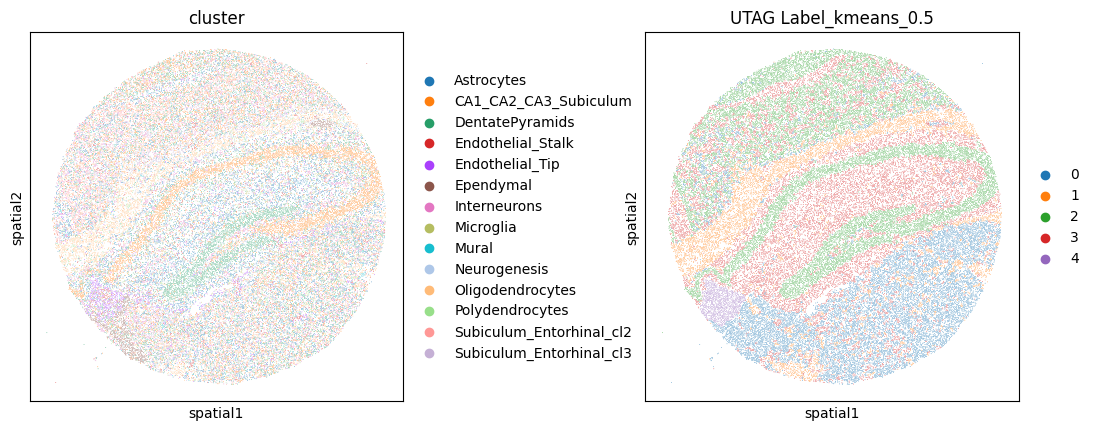

In [23]:
sc.pl.spatial(utag_results, color = ['cluster','UTAG Label_kmeans_0.5'], spot_size = 10)

In [25]:
fouri = sq.datasets.four_i()

  0%|          | 0.00/173M [00:00<?, ?B/s]

/home/june/miniconda3/envs/utag-test/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [26]:
# Run UTAG on provided data
utag_results = utag(
    fouri,
    slide_key=None,
    max_dist=20,
    normalization_mode='l1_norm',
    apply_clustering=True,
    clustering_method = 'kmeans', 
    resolutions = [0.5]
)

/home/june/miniconda3/envs/utag-test/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Applying UTAG Algorithm...


INFO:root:<class 'scipy.sparse._csr.csr_matrix'>
  0%|                                                                                             | 0/1 [00:00<?, ?it/s]

Applying K-means Clustering at Resolution: 0.5...


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.75it/s]


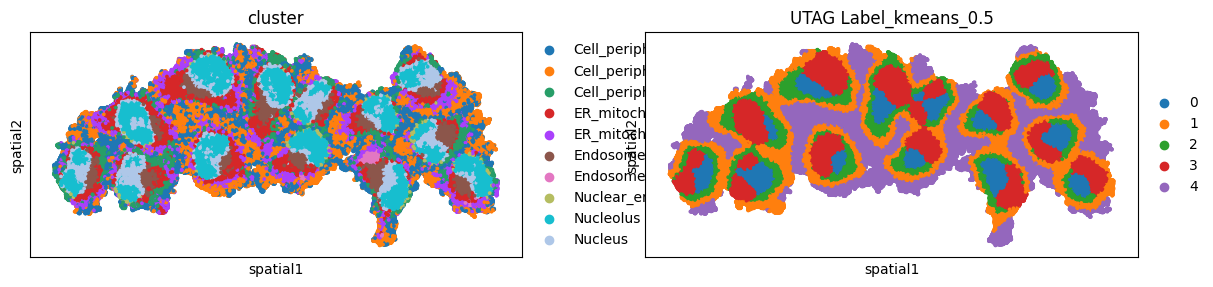

In [30]:
sc.pl.spatial(utag_results, color = ['cluster', 'UTAG Label_kmeans_0.5'], spot_size = 10)

In [ ]:
cortex = sq.datasets.sc_mouse_cortex()

  0%|          | 0.00/3.03G [00:00<?, ?B/s]

In [12]:
utag_results.obs['UTAG Label_kmeans_0.5']

0        4
1        4
2        0
3        1
4        1
        ..
71941    1
71942    4
71943    1
71944    1
71945    1
Name: UTAG Label_kmeans_0.5, Length: 71946, dtype: category
Categories (5, object): ['0', '1', '2', '3', '4']

In [17]:
pip install -e .

Obtaining file:///mnt/h/imc_projects/utag
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for utag (pyproject.toml) ... done
  Created wheel for utag: filename=utag-0.1.1.dev40+g8beadaa.d20240402-0.editable-py3-none-any.whl size=7409 sha256=ad36e48116c767f005a14d21fea17b4a081bb80957fc3b9dfb980783030e74da
  Stored in directory: /tmp/pip-ephem-wheel-cache-b8qbim5_/wheels/2a/3c/1c/e24a4e138deebc9faaf2a9e19db3bcf69ce00c328ac2af5e10
Successfully built utag
  Attempting uninstall: utag
    Found existing installation: utag 0.1.1.dev40+g8beadaa.d20240402
    Uninstalling utag-0.1.1.dev40+g8beadaa.d20240402:
      Successfully uninstalled utag-0.1.1.dev40+g8beadaa.d20240402
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install jupyter-resource-usage

168.74s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.6/46.6 kB 5.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
